# Test 3 {#sec-test_3}
The circuit in @fig-test_3 is from @Johnson1978 (Figure 4.8), but modified to include a capactior and inductor. AC analysis was performed at 1 rad/sec and also over a range of frequencies. The results are compared to those obtained from LTSpice.

![test circuit](test_3.png){#fig-test_3}

The net list for @fig-test_3 was generated by LTSpice and show below:
```
* test_3.asc
R2 2 5 2
V1 1 0 0 AC 1
I1 4 0 9
V2 0 5 0
E1 3 0 1 4 2
F1 2 3 V2 2
R1 1 4 2
C1 1 2 1
L1 4 3 1
;op
.ac list 0.159154943091895
.backanno
.end
```

In [1]:
#import os
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Load the net list

In [2]:
net_list = '''
R2 2 5 2
V1 1 0 1
I1 4 0 9
V2 0 5 0
E1 3 0 1 4 2
F1 2 3 V2 2
R1 1 4 2
C1 1 2 1
L1 4 3 1
'''

## Call the symbolic modified nodal analysis function

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

Display the equations

In [4]:
# reform X and Z into Matrix type for printing
Xp = Matrix(X)
Zp = Matrix(Z)
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*Xp)[i:i+1][0],Zp[i])))

Markdown(temp)

$- C_{1} s v_{2} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$<br>$- C_{1} s v_{1} + I_{F1} + v_{2} \left(C_{1} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$<br>$I_{Ea1} - I_{F1} - I_{L1} = 0$<br>$I_{L1} - \frac{v_{1}}{R_{1}} + \frac{v_{4}}{R_{1}} = - I_{1}$<br>$- I_{V2} - \frac{v_{2}}{R_{2}} + \frac{v_{5}}{R_{2}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{5} = V_{2}$<br>$- ea_{1} v_{1} + ea_{1} v_{4} + v_{3} = 0$<br>$I_{F1} - I_{V2} f_{1} = 0$<br>$- I_{L1} L_{1} s - v_{3} + v_{4} = 0$<br>

### Netlist statistics

In [5]:
print(report)

Net list report
number of lines in netlist: 9
number of branches: 9
number of nodes: 5
number of unknown currents: 5
number of RLC (passive components): 4
number of inductors: 1
number of independent voltage sources: 2
number of independent current sources: 1
number of op amps: 0
number of E - VCVS: 1
number of G - VCCS: 0
number of F - CCCS: 1
number of H - CCVS: 0
number of K - Coupled inductors: 0



### Connectivity Matrix

In [6]:
A

⎡       1                  -1                            ⎤
⎢C₁⋅s + ──    -C₁⋅s    0   ───   0   1   0   0  0     0  ⎥
⎢       R₁                  R₁                           ⎥
⎢                                                        ⎥
⎢                  1            -1                       ⎥
⎢  -C₁⋅s    C₁⋅s + ──  0    0   ───  0   0   0  1     0  ⎥
⎢                  R₂            R₂                      ⎥
⎢                                                        ⎥
⎢    0          0      0    0    0   0   0   1  -1   -1  ⎥
⎢                                                        ⎥
⎢   -1                     1                             ⎥
⎢   ───         0      0   ──    0   0   0   0  0     1  ⎥
⎢    R₁                    R₁                            ⎥
⎢                                                        ⎥
⎢              -1               1                        ⎥
⎢    0         ───     0    0   ──   0  -1   0  0     0  ⎥
⎢               R₂              R₂                      

### Unknown voltages and currents

In [7]:
X

### Known voltages and currents

In [8]:
Z

### Network dataframe

In [9]:
network_df

,element,p node,n node,cp node,cn node,Vout,value,Vname,Lname1,Lname2
0,V1,1,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,V2,0,5,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,R2,2,5,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,I1,4,0,NaN,NaN,NaN,9.0,NaN,NaN,NaN
4,Ea1,3,0,1,4,NaN,2.0,NaN,NaN,NaN
5,F1,2,3,NaN,NaN,NaN,2.0,V2,NaN,NaN
6,R1,1,4,NaN,NaN,NaN,2.0,NaN,NaN,NaN
7,C1,1,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN
8,L1,4,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Unknown current dataframe

In [10]:
i_unk_df

,element,p node,n node
0,V1,1,0
1,V2,0,5
2,Ea1,3,0
3,F1,2,3
4,L1,4,3


### Build the network equation matrix

In [11]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)
NE_sym

⎡                     ⎛       1 ⎞   v₄⎤        
⎢-C₁⋅s⋅v₂ + I_V1 + v₁⋅⎜C₁⋅s + ──⎟ - ──⎥        
⎢                     ⎝       R₁⎠   R₁⎥        
⎢                                     ⎥        
⎢                     ⎛       1 ⎞   v₅⎥   ⎡ 0 ⎤
⎢-C₁⋅s⋅v₁ + I_F1 + v₂⋅⎜C₁⋅s + ──⎟ - ──⎥   ⎢   ⎥
⎢                     ⎝       R₂⎠   R₂⎥   ⎢ 0 ⎥
⎢                                     ⎥   ⎢   ⎥
⎢         I_Ea1 - I_F1 - I_L1         ⎥   ⎢ 0 ⎥
⎢                                     ⎥   ⎢   ⎥
⎢                  v₁   v₄            ⎥   ⎢-I₁⎥
⎢           I_L1 - ── + ──            ⎥   ⎢   ⎥
⎢                  R₁   R₁            ⎥   ⎢ 0 ⎥
⎢                                     ⎥ = ⎢   ⎥
⎢                   v₂   v₅           ⎥   ⎢V₁ ⎥
⎢           -I_V2 - ── + ──           ⎥   ⎢   ⎥
⎢                   R₂   R₂           ⎥   ⎢V₂ ⎥
⎢                                     ⎥   ⎢   ⎥
⎢                 v₁                  ⎥   ⎢ 0 ⎥
⎢                                     ⎥   ⎢   ⎥
⎢                 -v₅                 ⎥ 

In [12]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

## Symbolic solution

In [13]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [14]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{1} R_{2} V_{1} s + V_{2} f_{1} - V_{2}}{C_{1} R_{2} s - f_{1} + 1}$<br>$v_{3} = \frac{I_{1} L_{1} R_{1} ea_{1} s + R_{1} V_{1} ea_{1}}{L_{1} s + R_{1} ea_{1} + R_{1}}$<br>$v_{4} = \frac{- I_{1} L_{1} R_{1} s + L_{1} V_{1} s + R_{1} V_{1} ea_{1}}{L_{1} s + R_{1} ea_{1} + R_{1}}$<br>$v_{5} = - V_{2}$<br>$I_{V1} = \frac{- C_{1} I_{1} L_{1} R_{2} s^{2} + C_{1} L_{1} V_{1} f_{1} s^{2} - C_{1} L_{1} V_{1} s^{2} + C_{1} L_{1} V_{2} f_{1} s^{2} - C_{1} L_{1} V_{2} s^{2} + C_{1} R_{1} V_{1} ea_{1} f_{1} s - C_{1} R_{1} V_{1} ea_{1} s + C_{1} R_{1} V_{1} f_{1} s - C_{1} R_{1} V_{1} s + C_{1} R_{1} V_{2} ea_{1} f_{1} s - C_{1} R_{1} V_{2} ea_{1} s + C_{1} R_{1} V_{2} f_{1} s - C_{1} R_{1} V_{2} s - C_{1} R_{2} V_{1} s + I_{1} L_{1} f_{1} s - I_{1} L_{1} s + V_{1} f_{1} - V_{1}}{C_{1} L_{1} R_{2} s^{2} + C_{1} R_{1} R_{2} ea_{1} s + C_{1} R_{1} R_{2} s - L_{1} f_{1} s + L_{1} s - R_{1} ea_{1} f_{1} + R_{1} ea_{1} - R_{1} f_{1} + R_{1}}$<br>$I_{V2} = \frac{- C_{1} V_{1} s - C_{1} V_{2} s}{C_{1} R_{2} s - f_{1} + 1}$<br>$I_{Ea1} = \frac{- C_{1} I_{1} R_{1} R_{2} ea_{1} s - C_{1} I_{1} R_{1} R_{2} s - C_{1} L_{1} V_{1} f_{1} s^{2} - C_{1} L_{1} V_{2} f_{1} s^{2} - C_{1} R_{1} V_{1} ea_{1} f_{1} s - C_{1} R_{1} V_{1} f_{1} s - C_{1} R_{1} V_{2} ea_{1} f_{1} s - C_{1} R_{1} V_{2} f_{1} s + C_{1} R_{2} V_{1} s + I_{1} R_{1} ea_{1} f_{1} - I_{1} R_{1} ea_{1} + I_{1} R_{1} f_{1} - I_{1} R_{1} - V_{1} f_{1} + V_{1}}{C_{1} L_{1} R_{2} s^{2} + C_{1} R_{1} R_{2} ea_{1} s + C_{1} R_{1} R_{2} s - L_{1} f_{1} s + L_{1} s - R_{1} ea_{1} f_{1} + R_{1} ea_{1} - R_{1} f_{1} + R_{1}}$<br>$I_{F1} = \frac{- C_{1} V_{1} f_{1} s - C_{1} V_{2} f_{1} s}{C_{1} R_{2} s - f_{1} + 1}$<br>$I_{L1} = \frac{- I_{1} R_{1} ea_{1} - I_{1} R_{1} + V_{1}}{L_{1} s + R_{1} ea_{1} + R_{1}}$<br>

## Construct a dictionary of element values

In [15]:
element_value_keys = []
element_value_values = []

for i in range(len(network_df)):
    if network_df.iloc[i]['element'][0] == 'F' or network_df.iloc[i]['element'][0] == 'E' or network_df.iloc[i]['element'][0] == 'G' or network_df.iloc[i]['element'][0] == 'H':
        element_value_keys.append(var(network_df.iloc[i]['element'].lower()))
        element_value_values.append(network_df.iloc[i]['value'])
    else:
        element_value_keys.append(var(network_df.iloc[i]['element']))
        element_value_values.append(network_df.iloc[i]['value'])

element_values = dict(zip(element_value_keys, element_value_values))

element_values

## DC operating point
Both V1 and I1 are active.

In [16]:
NE = NE_sym.subs(element_values)
NE_dc = NE.subs({s:0})
NE_dc

⎡I_V1 + 0.5⋅v₁ - 0.5⋅v₄ ⎤   ⎡ 0  ⎤
⎢                       ⎥   ⎢    ⎥
⎢I_F1 + 0.5⋅v₂ - 0.5⋅v₅ ⎥   ⎢ 0  ⎥
⎢                       ⎥   ⎢    ⎥
⎢  I_Ea1 - I_F1 - I_L1  ⎥   ⎢ 0  ⎥
⎢                       ⎥   ⎢    ⎥
⎢I_L1 - 0.5⋅v₁ + 0.5⋅v₄ ⎥   ⎢-9.0⎥
⎢                       ⎥   ⎢    ⎥
⎢-I_V2 - 0.5⋅v₂ + 0.5⋅v₅⎥   ⎢ 0  ⎥
⎢                       ⎥ = ⎢    ⎥
⎢          v₁           ⎥   ⎢1.0 ⎥
⎢                       ⎥   ⎢    ⎥
⎢          -v₅          ⎥   ⎢ 0  ⎥
⎢                       ⎥   ⎢    ⎥
⎢ -2.0⋅v₁ + v₃ + 2.0⋅v₄ ⎥   ⎢ 0  ⎥
⎢                       ⎥   ⎢    ⎥
⎢    I_F1 - 2.0⋅I_V2    ⎥   ⎢ 0  ⎥
⎢                       ⎥   ⎢    ⎥
⎣       -v₃ + v₄        ⎦   ⎣ 0  ⎦

In [17]:
U_dc = solve(NE_dc,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [18]:
table_header = ['unknown', 'mag']
table_row = []

for name, value in U_dc.items():
    table_row.append([str(name),float(value)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal'),tablefmt="simple",floatfmt=('5s','.6f')))

unknown          mag
---------  ---------
v1          1.000000
v2          0.000000
v3          0.666667
v4          0.666667
v5          0.000000
I_V1       -0.166667
I_V2        0.000000
I_Ea1      -8.833333
I_F1        0.000000
I_L1       -8.833333


The node voltages and current through the sources are solved for. The Sympy generated solution matches the LTSpice results:
```
       --- Operating Point ---

V(2):	 -2e-12	 voltage
V(5):	 0	 voltage
V(1):	 1	 voltage
V(4):	 0.666667	 voltage
V(3):	 0.666667	 voltage
I(C1):	 1e-12	 device_current
I(F1):	 2e-12	 device_current
I(L1):	 -8.83333	 device_current
I(I1):	 9	 device_current
I(R2):	 -1e-12	 device_current
I(R1):	 0.166667	 device_current
I(E1):	 -8.83333	 device_current
I(V1):	 -0.166667	 device_current
I(V2):	 1e-12	 device_current
```
The results from LTSpice agree with the SymPy results.

### AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.

Need to set I1 = 0

In [19]:
element_values[I1] = 0
NE = NE_sym.subs(element_values)
NE_w1 = NE.subs({s:1j})
NE_w1  # display the equations

⎡I_V1 + v₁⋅(0.5 + 1.0⋅ⅈ) - ⅈ⋅v₂ - 0.5⋅v₄⎤   ⎡ 0 ⎤
⎢                                       ⎥   ⎢   ⎥
⎢I_F1 - ⅈ⋅v₁ + v₂⋅(0.5 + 1.0⋅ⅈ) - 0.5⋅v₅⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢          I_Ea1 - I_F1 - I_L1          ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢        I_L1 - 0.5⋅v₁ + 0.5⋅v₄         ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢        -I_V2 - 0.5⋅v₂ + 0.5⋅v₅        ⎥   ⎢ 0 ⎥
⎢                                       ⎥ = ⎢   ⎥
⎢                  v₁                   ⎥   ⎢1.0⎥
⎢                                       ⎥   ⎢   ⎥
⎢                  -v₅                  ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢         -2.0⋅v₁ + v₃ + 2.0⋅v₄         ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢            I_F1 - 2.0⋅I_V2            ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎣           -ⅈ⋅I_L1 - v₃ + v₄           ⎦   ⎣ 0 ⎦

In [20]:
U_w1 = solve(NE_w1,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [21]:
table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_w1.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown         mag    phase, deg
---------  --------  ------------
v1         1.000000      0.000000
v2         0.894427    -26.565051
v3         0.657596     -9.462322
v4         0.677834      4.573921
v5         0.000000    nan
I_V1       0.294086    -36.027373
I_V2       0.447214    153.434949
I_Ea1      0.738882    149.683220
I_F1       0.894427    153.434949
I_L1       0.164399     -9.462322




```
       --- AC Analysis ---

frequency:	0.159155	Hz
V(2):	mag:   0.894427 phase:   -26.5651° 	voltage
V(5):	mag:          0 phase:          0° 	voltage
V(1):	mag:          1 phase:          0° 	voltage
V(4):	mag:   0.677834 phase:    4.57392° 	voltage
V(3):	mag:   0.657596 phase:   -9.46232° 	voltage
I(C1):	mag:   0.447214 phase:    153.435° 	device_current
I(F1):	mag:   0.894427 phase:    153.435° 	device_current
I(L1):	mag:   0.164399 phase:   -9.46232° 	device_current
I(I1):	mag:          0 phase:          0° 	device_current
I(R2):	mag:   0.447214 phase:   -26.5651° 	device_current
I(R1):	mag:   0.164399 phase:   -9.46232° 	device_current
I(E1):	mag:   0.738882 phase:    149.683° 	device_current
I(V1):	mag:   0.294086 phase:   -36.0274° 	device_current
I(V2):	mag:   0.447214 phase:    153.435° 	device_current
```


### AC Sweep
Looking at node 2 voltage and comparing the results with those obtained from LTSpice. Thr frequenct weep is from 0.01 Hz to 1 Hz.

In [22]:
NE = NE_sym.subs(element_values)
NE

⎡I_V1 - s⋅v₂ + v₁⋅(1.0⋅s + 0.5) - 0.5⋅v₄⎤   ⎡ 0 ⎤
⎢                                       ⎥   ⎢   ⎥
⎢I_F1 - s⋅v₁ + v₂⋅(1.0⋅s + 0.5) - 0.5⋅v₅⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢          I_Ea1 - I_F1 - I_L1          ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢        I_L1 - 0.5⋅v₁ + 0.5⋅v₄         ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢        -I_V2 - 0.5⋅v₂ + 0.5⋅v₅        ⎥   ⎢ 0 ⎥
⎢                                       ⎥ = ⎢   ⎥
⎢                  v₁                   ⎥   ⎢1.0⎥
⎢                                       ⎥   ⎢   ⎥
⎢                  -v₅                  ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢         -2.0⋅v₁ + v₃ + 2.0⋅v₄         ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢            I_F1 - 2.0⋅I_V2            ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎣           -I_L1⋅s - v₃ + v₄           ⎦   ⎣ 0 ⎦

In [23]:
U_ac = solve(NE,X)

### Plot the voltage at node 2

In [24]:
H = U_ac[v2]

In [25]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

In [31]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 200, endpoint=True)
x = np.logspace(-2, 0, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of node 2 voltage over the sweep range and plot along with the results obtained from SymPy.

In [32]:
fn = 'test_3.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

In [33]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

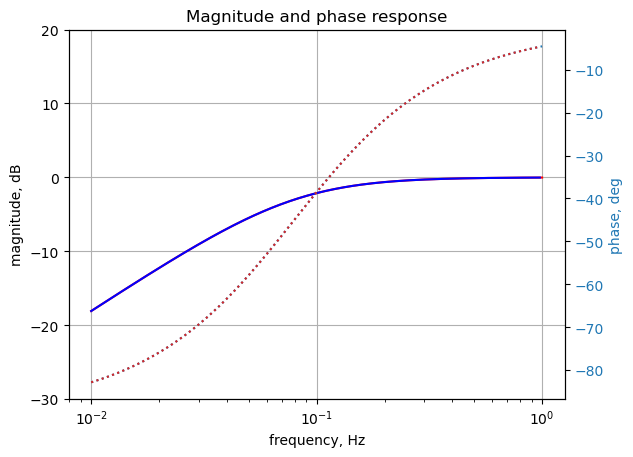

In [36]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-r')    # Bode magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.angle(voltage)*180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

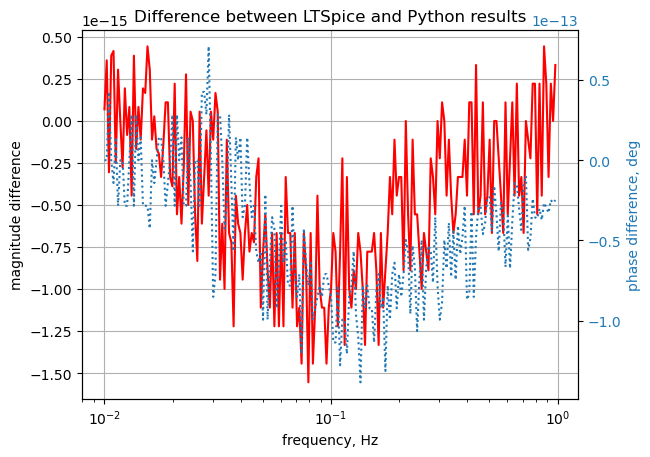

In [35]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude difference')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency[0:-1], np.abs(voltage[0:-1])-10**(mag/20),'-r')    # Bode magnitude plot
#plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[0:-1], np.unwrap(2*np.angle(voltage[0:-1])/2) *180/np.pi - phase,':',color=color)  # Bode phase plot
#plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase difference, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Difference between LTSpice and Python results')
plt.show()

The SymPy and LTSpice results overlay each other. 